In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random   

NUM_IMAGES = 1000

# Create data directory if it doesn't exist


# Create x values from -10 to 10
x = np.linspace(-10, 10, 100)

def get_random_quadratic(x):
    a = random.uniform(-100.0, 100.0)
    b = random.uniform(-100.0, 100.0)

    a = round(a, 2)
    b = round(b, 2)

    return a * x**2 + b * x 

def get_random_cubic(x):
    a = random.uniform(-100.0, 100.0)
    b = random.uniform(-100.0, 100.0)
    c = random.uniform(-100.0, 100.0)

    a = round(a, 2)
    b = round(b, 2)
    c = round(c, 2)

    return a * x**3 + b * x**2 + c * x 

def save_plot(x, y, i, folder):
    # Create figure with square aspect ratio
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x, y, linewidth=4)
    ax.set_xticks([])
    ax.set_yticks([])

    folder_name = f'data/{folder}'

    os.makedirs(folder_name, exist_ok=True)

    file_name = f'{folder_name}/{i}.png'
    plt.savefig(file_name, dpi=10)
    plt.close()  # Close the figure to prevent it from being displayed
    print(f"Plot saved to {file_name}")


for i in range(NUM_IMAGES):
    y_quadratic = get_random_quadratic(x)
    save_plot(x, y_quadratic, i, 'x_2')  

    y_cubic = get_random_cubic(x)
    save_plot(x, y_cubic, i, 'x_3')







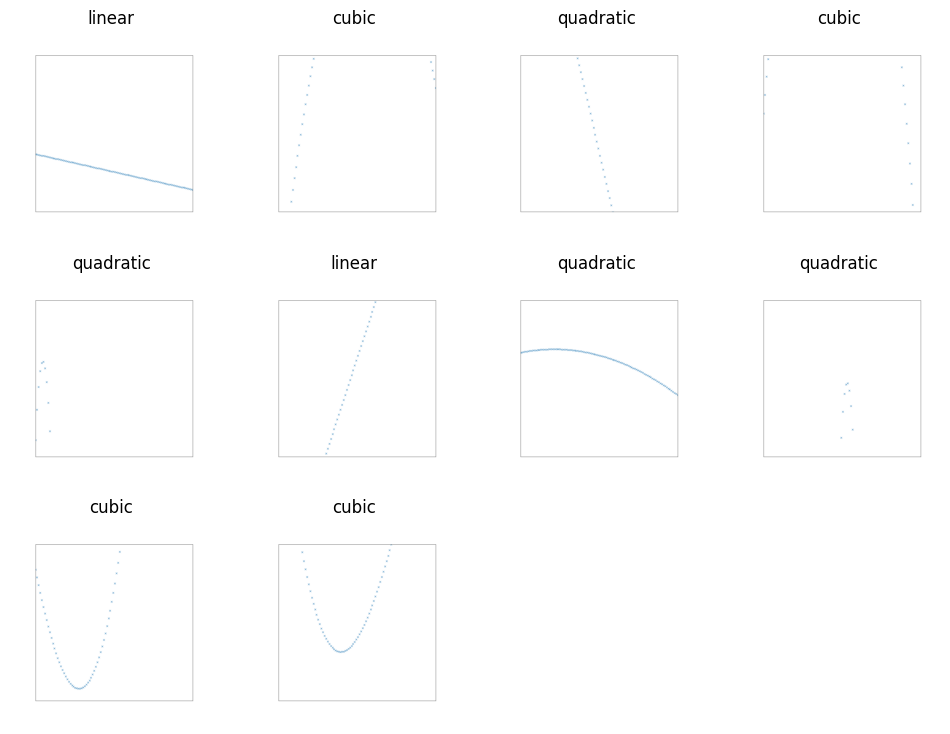

In [1]:
from fastai.vision.all import *

path = Path('data')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label
).dataloaders(path, bs=32)

dls.show_batch(max_n=10)

In [2]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.334009,0.930594,0.320000,00:12


epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 

In [ ]:
label,_,probs = learn.predict('data/x_3/1.png')
print(f"This is a: {label}.")

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)